<a href="https://colab.research.google.com/github/Kasamix/VehicleFuelOptimizer/blob/main/Car_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

David Vo and Chuyi Zhang

Mr. Jeremie Choquette

Introduction to computer programming in engineering and science

May 19th 2023

#Introduction - Problem definition

In our modern society, time has become an increasingly valuable commodity. It is therefore unsurprising that in Canada, which ranks as the fourth most car-dependent country, many drivers choose to drive at faster speeds on highways during their daily commutes in order to minimize travel time. However, by driving faster, this results in increased fuel consumption and expenses. Conversely, driving at slower speeds reduces fuel consumption, resulting in potential savings but this trade-off comes at the cost of time, which could be otherwise spent working and earning money. Hence, there exists an optimal driving speed at which the overall cost, comprising both gasoline expenditure and missed work time, is minimized. The aim of this project is to determine this optimal driving speed to save the most money, assuming:

1. A gas price of 1.50$/L

2. A commuting distance of 25km

3. An hourly salary of 25$/h

These values are averages gas prices, commuting distances, and salaries in Canada from 2022.

The determination of this minimum cost is contingent upon factors such as the vehicle's fuel efficiency, the individual's hourly wage, the current price of gasoline and the commuting distance. This study is carried out through an in-depth analysis of the physics behind a vehicle’s the fuel consumption in relation to the power required to drive at different speeds.

In this project, we will focus specifically on two types of energy losses: aerodynamic drag and rolling resistance. These factors play a significant role in determining fuel consumption while other losses, such as engine and drivetrain efficiency, energy usage of subsystems (like the radio and air conditioning), and braking losses, will be considered as a single efficiency coefficient. These additional factors can vary based on the specific make and model of the car and personal usage patterns. Then, the cost of fuel consumption at different speeds is calculated by converting the results into a monetary cost based on the price of fuel. By calculating the equivalent financial cost with the time sink cost based on the average wage, we will search for an optimal solution to the trade-off between driving time and fuel consumption.

The findings of this study have the potential to shed light on several significant aspects. Firstly, they can underscore the significance of adopting slower and more responsible driving practices. Secondly, they can offer insights into the inherent characteristics of car-dependent societies concerning issues such as pollution and environmental impact. Lastly, the study can emphasize the importance of enhancing personal financial management skills, particularly in the face of challenging economic conditions.


---
The following is a review of the equations concerning the resistive forces acting on a car, the kinetic energy of a car, and several conversion factors.

Resistive forces:

The drag force acting on a vehicle is:

$F_{\text{drag}} = \frac{1}{2} \rho A C_d v^2$

The rolling friction acting on a vehicle is:

$F_{\text{rolling}} = c_{rf} \text{m} g$

The kinetic energy of the vehicle is:

$KE = \frac{1}{2}mv^2$

The formula for the remaining energy available to propel a vehicle, accounting for energy losses caused by drag and rolling friction, can be expressed as:  

$K = E - (F_{drag} + F_{roll})\Delta x $

As such, the total energy provided to overcome resistive forces such as drag and rolling friction, as well as to initiate the motion of a vehicle can be expressed as:

$E = K + (F_{drag} + F_{roll})\Delta x $

The total energy supplied to a vehicle can be directly linked to the fuel consumption by considering the energy content provided by each liter of fuel. Additionally, the efficiency coefficient in the following equation represents the proportion of energy utilized by the car for actual motion, accounting for all other internal losses. The formula can be stated as follows:

$V_{fuel} = \frac{E}{E_{gas}\times C_{eff}}$



The fuel consumption of a vehicle is influenced by the distance covered, making fuel economy a more practical measure for different speeds. Fuel economy represents the distance a vehicle can travel per liter of gasoline. Conversely, by taking the inverse of this formula, we can calculate the fuel consumption per kilometer traveled. The formula for fuel economy in terms of kilometers per liter (km/L) is as follows:

$Economy = \frac{\Delta x}{V_{fuel}}$

The amount spent on gas is:

$ \$_{Gas} = \$_{GasPrice}\times V_{fuel}$

The opportunity cost, which represents the monetary loss resulting from time spent not working, can be calculated using the formula:

$ \$_{Work} = \$_{Salary}\times time$

As such, the total cost for a trip is given by:

$ \$_{Total} = \$_{Work} + \$_{Gas}$


# Model and numerical methods

Our numerical model/method aims to simulate and analyze the performance and costs associated with a vehicle's trip.

To begin, we define a class called "Vehicle" to encapsulate all the simulations. The class takes relevant parameters such as vehicle characteristics (cA, crf, m, efficiency_coefficient), gasoline properties (gasoline_energy), and distance to be traveled (distance_km).
The key methods in the class include:

* ```drag_force_fun```: Calculates the drag force acting on the vehicle using the given formula.
* ```rolling_friction_fun```: Calculates the rolling friction force acting on the vehicle using the provided equation.
* ```kin_energy_fun```: Computes the kinetic energy of the vehicle using the given formula.
* ```provided_energy_fun```: Determines the total energy provided to overcome drag, rolling friction, and distance. This combines the previous calculations with the distance.
* ```km_per_l_fun```: Computes the fuel efficiency of the vehicle in terms of kilometers per liter (km/L) based on the provided energy.
* ```gas_money_fun```: Calculates the money spent on gas during the trip by converting the fuel efficiency into liters per kilometer and multiplying it by the gas price.
* ```duration_fun```: Calculates the duration of the trip by dividing the distance by the velocity.
* ```work_money_fun```: Computes the money lost due to being late, given the trip duration and salary.
* ```cost_per_km_fun```: Computes the cost per kilometer by dividing the total money by the distance.

To determine the minimum cost, we utilized a golden section search algorithm. To apply this method, we needed to create a function called `total_money_fun`. This function calculates the total amount spent during a trip by summing the expenses for both fuel and missed work time. This function relies on many several previously mentioned functions to arrive at a solution, and for the purposes of examining the relationship between cost and speed, `total_money_fun` only takes one variable: speed. With the golden section function incorporated from previous projects, we defined the speed range for the golden section search as 50-180 km/h, consistent with the range used in the subsequent `simulate` method. By employing this approach, we can determine the minimum speed value and its corresponding cost value.

The ```simulate_trip``` method initializes empty lists to store the simulation results. It then creates an array of velocities within the range of 50-180 km/h. The method proceeds by iterating over this array of velocities and utilizing the various methods to calculate and append corresponding values to each list. These values include fuel efficiency, fuel consumption, gas money spent, money lost due to being late, trip duration, total money spent, and cost per kilometer.
After the iterations, the method determines the minimum value from the ```cost_per_km_list``` list. This minimum value corresponds to the optimal speed at which a driver should drive to minimize the cost per kilometer, ultimately allowing them to save the maximum amount of money.

In our implementation, we first set some global variables such as the acceleration due to gravity (g = 9.8), air density (rho = 1.28), gas price (gas_price = 1.5), salary (salary = 20), and rolling friction coefficient (crf = 0.015).


Next, we create an object ```vehicle``` representing the vehicle by instantiating the Vehicle class. The default vehicle paramaters are that of the Toyota Corolla, the sold vehicle in the world. The object is assigned to the variable vehicle and initialized with specific parameters:
* distance_km is set to 25 kilometers.
* cA represents the vehicle's coefficient of aerodynamic drag times its frontal area and is set to 0.631. It is simply the combined term of Cd and A found in the drag equation.
* m denotes the mass of the vehicle and is set to 1500 kilograms.
* crf is the rolling friction coefficient and is already defined as a global variable.
* gasoline_energy is the energy content of gasoline and is set to 33,526,000 Joules per liter.
* gasoline_efficiency represents the fuel efficiency of the vehicle and is set to 0.15, meaning that 15% of the energy provided by gasoline is actually used for motion.


After creating the `vehicle object`, we call the `simulate_trip()` method on it. This method performs the simulation for various velocities and returns several variables:

 `velocities, kmperl_list, lperkm_list, gas_money_list, money_list, duration_list, total_money_list, cost_per_km_list, minimum_money, and optimized_car_speed`.

These variables store the results of the simulation, such as the velocities tested, fuel efficiency in km/L, fuel consumption in L/100km, gas money spent, money lost due to being late, trip duration, total money spent, cost per kilometer, minimum cost per kilometer, and the corresponding optimized car speed.


By creating the vehicle object and invoking the `simulate_trip()` method, we obtain all the necessary metrics and insights related to the vehicle's trip.

To conduct a comprehensive examination of fuel efficiency, we conducted simulations using various car models representing different makes and models. Two primary variables taken into account for each car were its coefficient of aerodynamic drag (cA) and weight, as these factors have a significant impact on fuel economy. We imported a CSV file containing data for 20 cars, and for each car, we created an object to analyze its fuel economy. Subsequently, we generated graphs to visualize the fuel economy of each car.


#Validation

Our simulations reveal a consistent pattern: as speed increases, the fuel consumption required to cover a given distance also increases. This relationship follows a quadratic function, reflecting the quadratic power of speed in wind resistance and kinetic energy equations. This aligns with fundamental physics principles, indicating that greater resistance forces must be overcome when traveling at higher speeds. However, in real-world scenarios, the relationship between fuel consumption per kilometer and speed exhibits a U-shaped curve, as depicted in the accompanying graph, which differs from our model's findings. The primary factor contributing to this discrepancy is the model's omission of the engine's inefficient power output at low RPMs. Nevertheless, since the optimal balance identified in this study lies outside the low-velocity range, this particular aspect has minimal impact on the accuracy of our conclusions.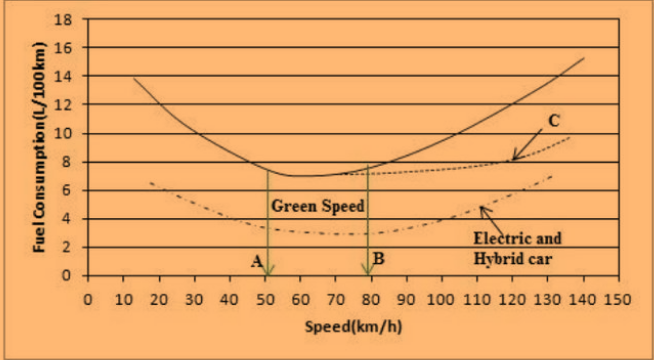  Fig. 1: Relation between fuel consumption versus average speed (Mostofa Kamal Nasir)

In fuel-efficient driving techniques, Natural Resources Canada suggests that increasing the speed from 100 km/h to 120 km/h over a 25km driving distance will result in a 20% increase in fuel consumption. In our simulation, which utilized data from the Toyota Corolla, we observed a 26.53% increase. It is important to note that the variation between these two figures falls within an acceptable range, as the exact fuel consumption varies depending on the model, road, and driving habits.

The recommended realistic driving speed falls within the range of 50–80 km/h, whereas this study suggests an optimal speed range of 92–102 km/h for distances ranging from 5–100 km. The discrepancy between the recommended speed and the simulation results stems from the consideration that as speed increases, the time cost diminishes. Consequently, the study's conclusion leans towards higher speeds, aligning with the understanding that time cost decreases with faster driving speeds.

Rhett Allain's study investigates the same topic, examining the relationship between driving speed, fuel consumption, and cost. In his article titled "Is There an Optimal Driving Speed that Saves Gas-and Money?" he explores the balance between time cost, represented by one's salary, and the cost of gas consumption, to determine the driving speed that yields maximum cost savings. Allain's findings indicate that for a 40-mile journey (64.37km), the optimal speed is 66 mph (approximately 106.217 km/h). This aligns closely with the results obtained from our "Optimized Speed vs. Distance" graph, where the optimal speed for the same distance is around 101.5 km/h. The deviation between the two models' conclusions is only 4%. Hence, it can be inferred that both models reach similar conclusions regarding this matter.



#Results

---
We generated multiple graphs to analyze the key metrics affecting vehicle performance at highway speeds.

Figures 1 and 2 present fuel efficiency graphs. Figure 1 illustrates the relationship between speed and fuel efficiency, specifically the number of kilometers a car can travel per liter of fuel consumed. In Figure 2, we explore the fuel consumption in liters for a fixed distance of 100 km, which is a commonly used unit of measure in Canada. As expected, the fuel economy of the car decreases with increasing velocity. In Figure 2, we observe that as the speed increases, the amount of fuel consumed for a 100 km trip also increases. This correlation is in line with our expectations.

Additionally, the shape of the fuel consumption graph is quadratic. This finding aligns with the influence of aerodynamic drag on fuel economy, which is quadratically proportional to velocity. The quadratic nature of the graph means that even slight increases in speed at higher velocities result in significantly worse fuel economy. It implies that maintaining higher speeds requires a disproportionately higher amount of fuel. Overall, these graphs demonstrate the inverse relationship between speed and fuel efficiency. As speed increases, fuel economy decreases, and the quadratic shape of the graph indicates the significant impact of aerodynamic drag on overall fuel consumption at higher speeds.

---
We generated two additional graphs to illustrate the cost of gas and the opportunity cost associated with time not spent working.
Figure 3 exhibits a direct correlation with Figure 2, as both graphs depict the relationship between the amount of fuel consumed and the corresponding fuel price. As expected, the graph shows that as the amount of fuel used increases, the cost of gas also rises accordingly.
Figure 4 represents the opportunity cost associated with the time not spent working. As anticipated, since time and speed are inversely proportional, the shape of the graph aligns with this relationship. The graph demonstrates that as speed increases, the opportunity cost of not working also increases. These findings confirm our expectations that driving at higher speeds results in a greater financial loss due to the time not utilized for work.
In summary, the graphs provide visual evidence supporting the expected outcomes. Figure 3 illustrates the direct correlation between fuel consumption and cost, while Figure 4 reflects the proportional relationship between speed and the opportunity cost of not working. These results reinforce the understanding that driving at faster speeds leads to both increased fuel expenses and a higher financial loss due to the time spent not working.

---
Subsequently, we generated two graphs illustrating the relationship between a driver's speed and the total cost. These graphs combine the gas expenses and opportunity cost graphs, enabling us to identify the minimum cost value using the previously mentioned golden section search. In Figure 5, under the given initial conditions, the optimal speed for a 25 km journey, minimizing costs, is approximately 100 km/h, resulting in a total cost of $9.14. Figure 6 presents a more practical measure: cost per kilometer rather than the overall cost. The minimum point on these graphs are to be expected since extreme speeds lead to excessive gas expenses or significant loss of work time. Consequently, the ideal balance lies in the middle, around 100 km/h.

---
We also created a comparative graph (Figure 8)to analyze the fuel economies of 10 different cars, each with varying drag coefficients, frontal areas, and weights. The graph clearly illustrates that larger vehicles like the Hummer or Mercedes G Class exhibit significantly lower fuel economies compared to smaller cars such as the Corolla or Civic. This outcome aligns with expectations, as larger values of drag coefficient (cA) and weight (m) contribute to higher drag forces and rolling friction, resulting in reduced fuel efficiency. Consequently, for individuals driving these larger vehicles who aim to minimize both fuel expenses and time wasted, it is evident that the curves depicting fuel economy reach their minimum points at slower speeds. This finding is unsurprising, as driving faster in these vehicles would lead to increased fuel consumption.

---
In our final analysis, we compared the total expenses associated with driving a conventional gasoline car (Toyota Corolla) and an electric car (Tesla Model 3) at different speeds (Figure 9). The results presented in the graphs reveal a consistent pattern: the Tesla Model 3 consistently demonstrates a lower cost per kilometer. This outcome aligns with expectations, considering the higher efficiency coefficient of the Model 3 (0.77) compared to the Corolla (0.15). A higher efficiency coefficient indicates that the Model 3 effectively mitigates inefficiencies within its engine, such as drive train inefficiency and heat loss, allowing for more efficient use of energy for motion. Furthermore, it has been shown that electric cars are able to increase their energy efficiency through regenerative braking, a process in which a car transform its current kinetic energy into a form that can immediately be used thereafter while braking.
As such, the cost of electricity for the Tesla Model 3 is considerably lower than the cost of fuel for the Corolla, as depicted in the graph. Notably, as the speed of the Model 3 increases, there is no significant upward slope indicating higher costs, in contrast to the Corolla.
Overall, these findings demonstrate the financial advantages of the Tesla Model 3 over the Toyota Corolla, with its higher efficiency and lower cost of electricity.


#Discussion

---
Contextualizing results:

The objective of this project was to determine the optimal driving speed for minimizing costs, considering both the opportunity cost and fuel expenses during highway travel over a distance of 25km. With a gas price of 1.5 dollars per liter and an hourly wage of 20, we aimed to uncover valuable insights beyond a mere numerical value representing the optimal speed. Our goal was to explore the intricate relationship between speed and various crucial factors that must be taken into consideration while operating a vehicle.

The key findings of our study revealed that driving at higher speeds consistently results in increased fuel consumption, and not linearly, but quadratically. This indicates that driving excessively fast is highly inefficient due to the substantial gas wastage caused by air resistance. Moreover, we observed that larger vehicles consistently exhibit poorer fuel economies compared to smaller cars. This is attributed to their larger frontal area and increased mass, which contribute to higher resistive forces.

Now, to contextualize these findings, in 2022, the Ford F-150 stands out as the best-selling vehicle in the United States. However, this fact is concerning because a study shows that 63% of Ford F-150 owners rarely or never utilize their trucks for towing purposes, while 32% never use them for personal hauling. This highlights the paradoxical situation where individuals are purchasing larger vehicles with significant frontal areas and greater weights, yet fail to capitalize on these capabilities for practical purposes. Consequently, this leads to excessive fuel consumption and wastage.

Indeed, our comparative analysis revealed that vehicles similar to the Ford F-150, such as the Hummer, consistently exhibit significantly poorer fuel economy. In a world grappling with the urgent issue of climate change, it is crucial for us to address the environmental impact of our daily activities and take proactive measures to reduce carbon emissions. One of the key contributors to carbon emissions is the amount of fuel consumed in transportation. According to Natural Resources Canada, each liter of gasoline releases 2.3 kg of CO2. While this may not seem substantial on an individual basis, when we consider the average one-way commute distance of 61 km and the fact that millions of people rely on cars or personal vehicles as their primary means of transportation, the cumulative effect becomes significant.

This underscores the importance of promoting alternative modes of transportation such as trains, buses, and metros to reduce our reliance on individual vehicles. Additionally, our project highlights the need to reevaluate car-dependent communities. Fuel consumption is directly linked to travel distance, meaning the longer the commute, the higher the fuel consumption and subsequent environmental pollution. In countries like the United States and Canada, where many individuals have lengthy commutes, the amount of fuel expended and its detrimental impact on the environment becomes substantial.

---
Limitations:

The model we employed to determine the energy required for car movement and account for drag and rolling friction has some notable limitations. Firstly, the efficiency coefficient we utilized is not flawless and fails to accurately represent the actual fuel consumption of real-world cars in motion. Its simplicity hinders accurate energy modeling.

Furthermore, the specific question at hand, seeking to determine the optimal speed for a 25km commute with a gas price of 1.5 dollars per liter and a salary of 20$/h, is highly dependent on these factors and is too narrow to provide a broader answer. If gas prices were to rise, it would be preferable to drive at slower speeds to improve fuel economy. Conversely, if one's salary were to increase, there might be a preference for driving faster to arrive at work earlier. However, driving excessively fast can have dire consequences, potentially leading to accidents.

Additionally, the concept of opportunity cost in this context has its limitations. Time spent commuting is not necessarily wasted if one arrives at work on time. Moreover, not all drives are solely for the purpose of earning money; some individuals may be running errands or traveling for personal reasons. Consequently, ignoring the opportunity cost term would imply that the absolute best speed for maximizing fuel economy is zero kilometers per hour, which is impractical.

---
Further studies:


To ensure the continued advancement of this study, several avenues warrant exploration. Firstly, it would be enlightening to conduct a comprehensive comparison of CO2 emissions per liter consumed across various modes of transportation, encompassing cars, trains, and even bikes, while considering their respective carrying capacities. This analysis would provide valuable insights into the environmental impact of different transportation options.
Additionally, further investigation into fuel efficiency within urban driving contexts is crucial. Areas characterized by frequent acceleration and braking, such as dense urban areas, are expected to exhibit diminished fuel economies, resulting in heightened energy losses and overall reduced speeds. By delving deeper into these factors, we can gain a better understanding of how driving conditions influence fuel efficiency in urban settings.
Another area deserving attention is the design of more efficient traffic and road networks. Such studies could focus on strategies to minimize commuting distances and enhance fuel economy on a national scale. By optimizing transportation infrastructure, we can mitigate energy wastage and contribute to more sustainable and efficient mobility systems.
Furthermore, it is worth considering the development of a more precise model that accurately simulates the complex physics of a moving car. This advanced model would account for the various energy losses occurring within the vehicle itself. By incorporating these factors, we can attain a more nuanced understanding of the intricate interplay between different energy sources and their impact on overall fuel efficiency.
As this study progresses, it is important to recognize its limitations. Refining the model to address these limitations, such as making it more representative of real-world conditions and expanding its applicable parameter ranges, would enhance the validity and applicability of the findings.


#Conclusion

In conclusion, our project aimed to identify the ideal driving speed for highway travel, but it unexpectedly brought attention to significant aspects surrounding the nature of automobiles. Our investigation shed insight on the interaction between speed, fuel consumption, and other important elements in addition to identifying the ideal driving speed for minimising costs. The consequences of our findings are particularly important for popular cars like the Ford F-150, where a big proportion of owners unintentionally squander gasoline by not fully utilising their larger trucks. It also emphasises how critical it is to review our travel options in light of climate change. We can drastically lower gasoline usage and lessen the negative effects it has on the environment by promoting alternate modes of transportation and reevaluating areas that rely heavily on cars. Additionally, it's critical to recognise the limitations of our approach, the reliance on particular variables when establishing the ideal pace, and the complexity of opportunity cost when it comes to commuting.



#Sources

"Does Driving Slower Save Fuel?" WhichCar, www.whichcar.com.au/car-advice/does-driving-slower-save-fuel#:~:text=Going%20slower%20theoretically%20saves%20fuel,exponentially%20the%20faster%20you%20go.

"Fuel-efficient driving techniques." Natural Resources Canada, Government of Canada, Energy Efficiency, Transportation - Alternative Fuels, Personal Vehicles, 2023, natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/fuel-efficient-driving-techniques/21038#:~:text=Avoid%20high%20speeds&text=Most%20cars%2C%20vans%2C%20pickup%20trucks,at%20100%20km%20per%20hour.

Allain, Rhett. "Is There an Optimal Driving Speed that Saves Gas—and Money?" Wired, 1 Apr. 2022, www.wired.com/story/is-there-an-optimal-driving-speed-that-saves-gas-and-money/.
Auto$mart. Natural Resources Canada: Learn the Facts: Fuel Consumption and CO2. Natural Resources Canada, https://natural-resources.canada.ca/sites/www.nrcan.gc.ca/files/oee/pdf/transportation/fuel-efficient-technologies/autosmart_factsheet_6_e.pdf.

Flynn, Jack. "15+ Average Commute Time Statistics [2023]: How Long Is the Average American Commute?" Zippia, 13 Feb. 2023, www.zippia.com/advice/average-commute-time-statistics/#:~:text=The%20average%20American%20commutes%2041,workers%20drive%20alone%20to%20work.

Lauer, Alex. "Many Pickup Truck Owners Freely Admit They Don’t Actually Need Trucks." InsideHook, 27 Jan. 2023, www.insidehook.com/daily_brief/vehicles/pickup-truck-owners-admit-dont-need-trucks.

Government of Canada, Statistics Canada. “Employment, Average Hourly and Weekly Earnings (Including Overtime), and Average Weekly Hours for the Industrial Aggregate Excluding Unclassified Businesses, Monthly, Seasonally Adjusted.” Www150.Statcan.gc.ca, 30 June 2011, www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410022201.

Sébastien Larochelle-Côté, et al. “Commuting Is a Fact of Life for Millions of Canadians. Using Data from the 2016 Census on Place of Work and Commuting, This Study Examines the Characteristics of Those Who Spend at Least 60 Minutes Travelling to Work, with a Focus on Those Who Commute by Car, Truck or van (or Car Commuters).” Statcan.gc.ca, Government of Canada, Statistics Canada, 25 Feb. 2019, www150.statcan.gc.ca/n1/pub/75-006-x/2019001/article/00002-eng.htm.

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time
'''Create a Class Vehicle for all simulations'''

class Vehicle:

    def __init__(self, **kwargs):
        self.distance_km = distance_km
        self.distance = self.distance_km * 1000
        self.cA = kwargs.get('cA')
        self.crf = kwargs.get('crf')
        self.m = kwargs.get('m')
        self.gasoline_energy = kwargs.get('gasoline_energy')
        self.efficiency_coefficient = kwargs.get('efficiency_coefficient')
        self.NSTEPS = 1000

    def drag_force_fun(self, v):
        """Calculate the drag force acting on the vehicle."""
        return 0.5 * rho * self.cA * v**2  # N

    def rolling_friction_fun(self):
        """Calculate the rolling friction force acting on the vehicle."""
        return self.crf * self.m * g  # N

    def kin_energy_fun(self, v):
        """Calculate the kinetic energy of the vehicle."""
        return 0.5 * self.m * v**2  # J

    def provided_energy_fun(self, v):
        """Calculate the total energy provided to overcome drag, rolling friction, and distance."""
        drag = self.drag_force_fun(v)
        roll = self.rolling_friction_fun()
        kin = self.kin_energy_fun(v)
        return kin + (roll + drag) * self.distance  # J

    def km_per_l_fun(self, provided_energy):
        """Calculate the fuel efficiency of the vehicle."""
        fuel_consumed = provided_energy / (self.gasoline_energy * self.efficiency_coefficient)
        return self.distance_km / fuel_consumed  # km/L

    def gas_money_fun(self, fuel_efficiency):
        """Calculate the money spent on gas during the trip."""
        gas_money = (self.distance / (fuel_efficiency * 1000)) * gas_price
        return gas_money  # ($)

    def duration_fun(self, v):
        """Calculate the duration of the trip."""
        return self.distance / v  # (s)

    def work_money_fun(self, duration):
        """Calculate the money lost due to being late."""
        return abs((duration / 3600) * salary)  # ($)

    def cost_per_km_fun(self, total_money):
        """Calculate the cost per km."""
        return total_money/self.distance_km

    def total_money_fun(self, vkmh):
      """Get the total money lost"""
      v = vkmh / 3.6

      provided_energy = self.provided_energy_fun(v)

      fuel_efficiency = self.km_per_l_fun(provided_energy)

      gas_money = self.gas_money_fun(fuel_efficiency)

      duration = self.duration_fun(v)

      money = self.work_money_fun(duration)

      return money+gas_money

    def golden_section_optimized(self,f,x1,x2):
      """Find the minimum money lost and the velocity where it occurs"""
      # start_time=time.time()
      gr1=0.61803399
      gr2=1.0-gr1

      x3=x1+gr2*(x2-x1)
      x4=x1+gr1*(x2-x1)
      f3=f(x3)
      f4=f(x4)

      for i in range(self.NSTEPS):
        if f3 < f4:
          x2=x4
          x4=x3
          f4=f3
          x3=x1+(gr2*(x2-x1))
          f3=f(x3)
        else:
          x1=x3
          x3=x4
          f3=f4
          x4=x1+gr1*(x2-x1)
          f4=f(x4)

      # print(f"Completed faster golden section search in {time.time()-start_time} seconds")
      return round((x1+x2)/2,2),round(f((x1+x2)/2),2)


    def simulate_trip(self):
       #create velocities list
        min_kmh = 50
        max_kmh = 180
        velocities = np.arange(min_kmh, max_kmh + 1, 1)

      #create list for other datas to return
        kmperl_list = []
        lper100km_list = []
        gas_money_list = []
        money_list = []
        duration_list = []
        total_money_list = []
        cost_per_km_list = []

      #loop through the velocities list
        for vkmh in velocities:
            #conversation kmh --> m/s
            v = vkmh / 3.6

            #calculate fuel depense
            provided_energy = self.provided_energy_fun(v)

            fuel_efficiency = self.km_per_l_fun(provided_energy)
            kmperl_list.append(fuel_efficiency)

            lper100km_list.append(100/fuel_efficiency)

            gas_money = self.gas_money_fun(fuel_efficiency)
            gas_money_list.append(gas_money)

            #calculate money lost due to time lost
            duration = self.duration_fun(v)
            duration_list.append(duration)

            money = self.work_money_fun(duration)
            money_list.append(money)

            #calculate total money lost
            total_money = self.total_money_fun(vkmh)
            total_money_list.append(total_money)

            cost_per_km = self.cost_per_km_fun(total_money)
            cost_per_km_list.append(cost_per_km)

        #Optimize money loss to find the corresponding speed
        optimized_car_speed, minimum_money = self.golden_section_optimized(self.total_money_fun,min_kmh,max_kmh)

        return velocities, kmperl_list, lper100km_list, gas_money_list, money_list, duration_list, total_money_list, cost_per_km_list, minimum_money, optimized_car_speed

In [ ]:
#global variables
g = 9.8
rho = 1.28
gas_price = 1.5
salary = 20
crf=0.015

#create object Toyota Corolla L/LE sedan (E170),
gasoline_energy = 33526000
efficiency_coefficient = 0.15
distance_km=25
cA = 0.631
m=1500

Toyota_Corolla_25km = Vehicle(
    distance_km=distance_km,
    cA=cA,
    m=m,
    crf=crf,
    gasoline_energy=gasoline_energy,
    efficiency_coefficient=efficiency_coefficient
    )

velocities, kmperl_list, lper100km_list, gas_money_list, money_list, duration_list, total_money_list, cost_per_km_list, minimum_money, optimized_car_speed = Toyota_Corolla_25km.simulate_trip()

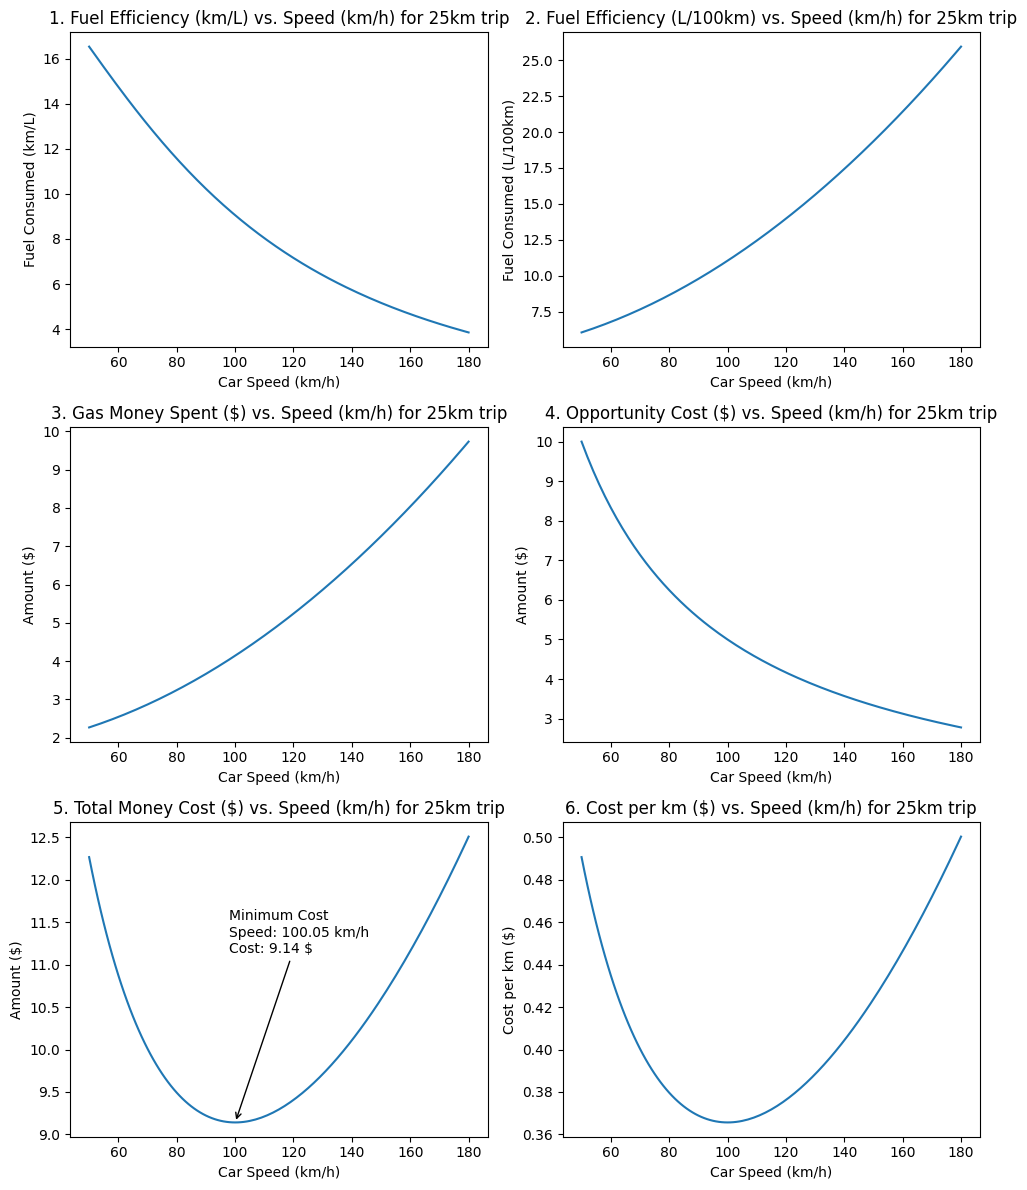

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Create a 4x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

#1. Fuel Efficiency (km/L) vs. Speed (km/h) for 25km
axs[0, 0].plot(velocities, kmperl_list)
axs[0, 0].set_title(f"1. Fuel Efficiency (km/L) vs. Speed (km/h) for {distance_km}km trip")
axs[0, 0].set_xlabel("Car Speed (km/h)")
axs[0, 0].set_ylabel("Fuel Consumed (km/L)")

#2. Fuel Efficiency (L/100km) vs. Speed (km/h)
axs[0, 1].plot(velocities, lper100km_list)
axs[0, 1].set_title(f"2. Fuel Efficiency (L/100km) vs. Speed (km/h) for {distance_km}km trip")
axs[0, 1].set_xlabel("Car Speed (km/h)")
axs[0, 1].set_ylabel("Fuel Consumed (L/100km)")

#3. Gas Money Spent ($) vs. Speed (km/h) for 25km trip
axs[1, 0].plot(velocities, gas_money_list)
axs[1, 0].set_title(f"3. Gas Money Spent ($) vs. Speed (km/h) for {distance_km}km trip")
axs[1, 0].set_xlabel("Car Speed (km/h)")
axs[1, 0].set_ylabel("Amount ($)")

#4. Opportunity Cost ($) vs. Speed (km/h) for 25km trip
axs[1, 1].plot(velocities, money_list)
axs[1, 1].set_title(f"4. Opportunity Cost ($) vs. Speed (km/h) for {distance_km}km trip")
axs[1, 1].set_xlabel("Car Speed (km/h)")
axs[1, 1].set_ylabel("Amount ($)")

#5. Total Money Cost ($) vs. Speed (km/h) for 25km trip

  # annotate the optimazation
arrow_text = f"Minimum Cost\nSpeed: {optimized_car_speed} km/h\nCost: {minimum_money} $"
axs[2, 0].annotate(arrow_text, xy=(optimized_car_speed, minimum_money),
                   xytext=(optimized_car_speed-2, minimum_money+2),
                   arrowprops=dict(arrowstyle='->'))

axs[2, 0].plot(velocities, total_money_list)
axs[2, 0].set_title(f"5. Total Money Cost ($) vs. Speed (km/h) for {distance_km}km trip")
axs[2, 0].set_xlabel("Car Speed (km/h)")
axs[2, 0].set_ylabel("Amount ($)")

#6. Cost per km (5) vs. Speed (km/h) for 25km trip
axs[2, 1].plot(velocities, cost_per_km_list)
axs[2, 1].set_title(f"6. Cost per km ($) vs. Speed (km/h) for {distance_km}km trip")
axs[2, 1].set_xlabel("Car Speed (km/h)")
axs[2, 1].set_ylabel("Cost per km ($)")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
#validation
"""Natural ressource Canada:"For example, at 120 km per hour, a vehicle uses about 20% more fuel than at 100 km per hour.
On a 25-km trip, this spike in speed
– and fuel consumption – would cut just two minutes from your travel time." """

#call values of gas depense for 100km/h and 120km/h of Toyota_Corolla_25km
velocities, kmperl_list, lper100km_list, gas_money_list, money_list, duration_list, total_money_list, cost_per_km_list, minimum_money, optimized_car_speed = Toyota_Corolla_25km.simulate_trip()
velocities_list = velocities.tolist()
gas_money_100 = gas_money_list[velocities_list.index(100)]
gas_money_120 = gas_money_list[velocities_list.index(120)]
#calculate the augmentation ratio
ratio = (gas_money_120/gas_money_100-1)*100
#print the result to compare with the data from Natural ressources Canada
print(f"at 120 km per hour, a vehicle uses about {ratio}% more fuel than at 100 km per hour.")

at 120 km per hour, a vehicle uses about 26.52688686062412% more fuel than at 100 km per hour.


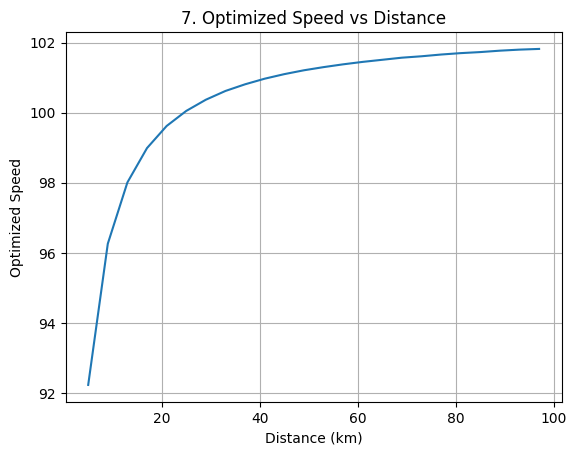

In [ ]:
#Change in optimal velocity when distance varies

#create list of distance
distance_km_list = np.arange(5, 101,4)
optimized_speed_list = []
#loop
for distance_km in distance_km_list:
    Toyota_Corolla_different_speed = Vehicle(
    distance_km = distance_km,
    cA=cA,
    crf=crf,
    m=m,
    gasoline_energy=gasoline_energy,
    efficiency_coefficient=efficiency_coefficient
    )
    velocities, kmperl_list, lper100km_list, gas_money_list, money_list, duration_list, total_money_list, cost_per_km_list, minimum_money, optimized_car_speed = Toyota_Corolla_different_speed.simulate_trip()
    optimized_speed_list.append(optimized_car_speed)

plt.plot(distance_km_list, optimized_speed_list)
plt.xlabel('Distance (km)')
plt.ylabel('Optimized Speed')
plt.title('7. Optimized Speed vs Distance')
plt.grid(True)
plt.show()

In [ ]:
#import csv of 10 differents cars' datas
import pandas as pd
path_to_data = "https://docs.google.com/spreadsheets/d/1F2jqetQ7Kxi86qbYLoJ1yEvB-FlzoasaNgf4m8G4v5s/export?format=csv"
best_sell_car_data = pd.read_csv(path_to_data)


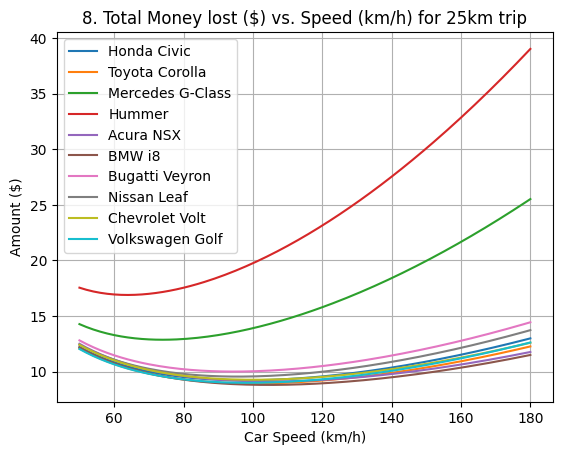

In [ ]:
#Stimulate money wasted for 10 differents cars for a 25 km trip

distance_km = 25

model_list = []
optimized_speed_by_mark_list_30km = []
minimum_money_list = []

for index, row in best_sell_car_data.iterrows():
  model = row['Car']
  cA = row['Drag coefficient']
  m = row['Weight (kg)']
  vehicle = Vehicle(distance_km=distance_km, cA=cA, crf=crf, m=m, gasoline_energy=gasoline_energy, efficiency_coefficient=efficiency_coefficient)
  velocities, kmperl_list, lper100km_list, gas_money_list, money_list, duration_list, total_money_list, cost_per_km_list, minimum_money, optimized_car_speed = vehicle.simulate_trip()
  plt.plot(velocities, total_money_list, label=model)

  model_list.append(model)
  optimized_speed_by_mark_list_30km.append(optimized_car_speed)
  minimum_money_list.append(minimum_money)

plt.xlabel("Car Speed (km/h)")
plt.ylabel("Amount ($)")
plt.title(f"8. Total Money lost ($) vs. Speed (km/h) for {distance_km}km trip")
plt.legend()
plt.grid(True)
plt.show()


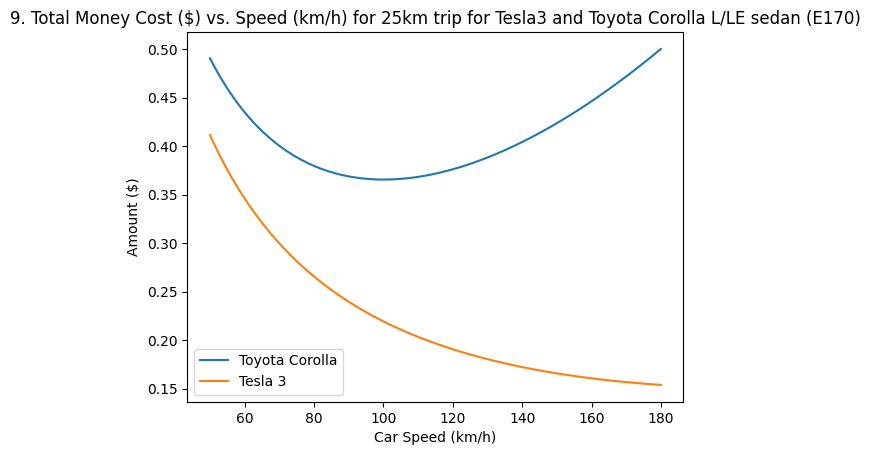

In [ ]:
#comparaison between Electric Car and Fuel Combustion Car
distance_km = 25

#Toyota Corolla L/LE sedan (E170)

velocities, kmperl_list, lper100km_list, gas_money_list, money_list, duration_list, total_money_list, cost_per_km_list, minimum_money, optimized_car_speed = Toyota_Corolla_25km.simulate_trip()
plt.plot(velocities, cost_per_km_list, label = "Toyota Corolla")

#Tesla 3

gas_price = 0.1042 #electricity price($/kwh)

Tesla3 = Vehicle(
  distance_km = distance_km,
  cA = 0.23*2.22, #cd*Af
  crf = crf,
  m = 1612,#kg
  gasoline_energy = 3600000, #conversion of energy(J/kwh)
  efficiency_coefficient = 0.77) #Electric motor efficiency

velocities, kmperl_list, lper100km_list, gas_money_list, money_list, duration_list, total_money_list, cost_per_km_list, minimum_money, optimized_car_speed = Tesla3.simulate_trip()
plt.plot(velocities, cost_per_km_list, label= "Tesla 3")

plt.title(f"9. Total Money Cost ($) vs. Speed (km/h) for {distance_km}km trip for Tesla3 and Toyota Corolla L/LE sedan (E170)")
plt.xlabel("Car Speed (km/h)")
plt.ylabel("Amount ($)")
plt.legend()